<a href="https://colab.research.google.com/github/umiSirya/MachineLearning-1/blob/main/Obesitylevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [6]:
df.duplicated().sum()

24

In [7]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

In [13]:
#columns with numerical data
numerical_data = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_data)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


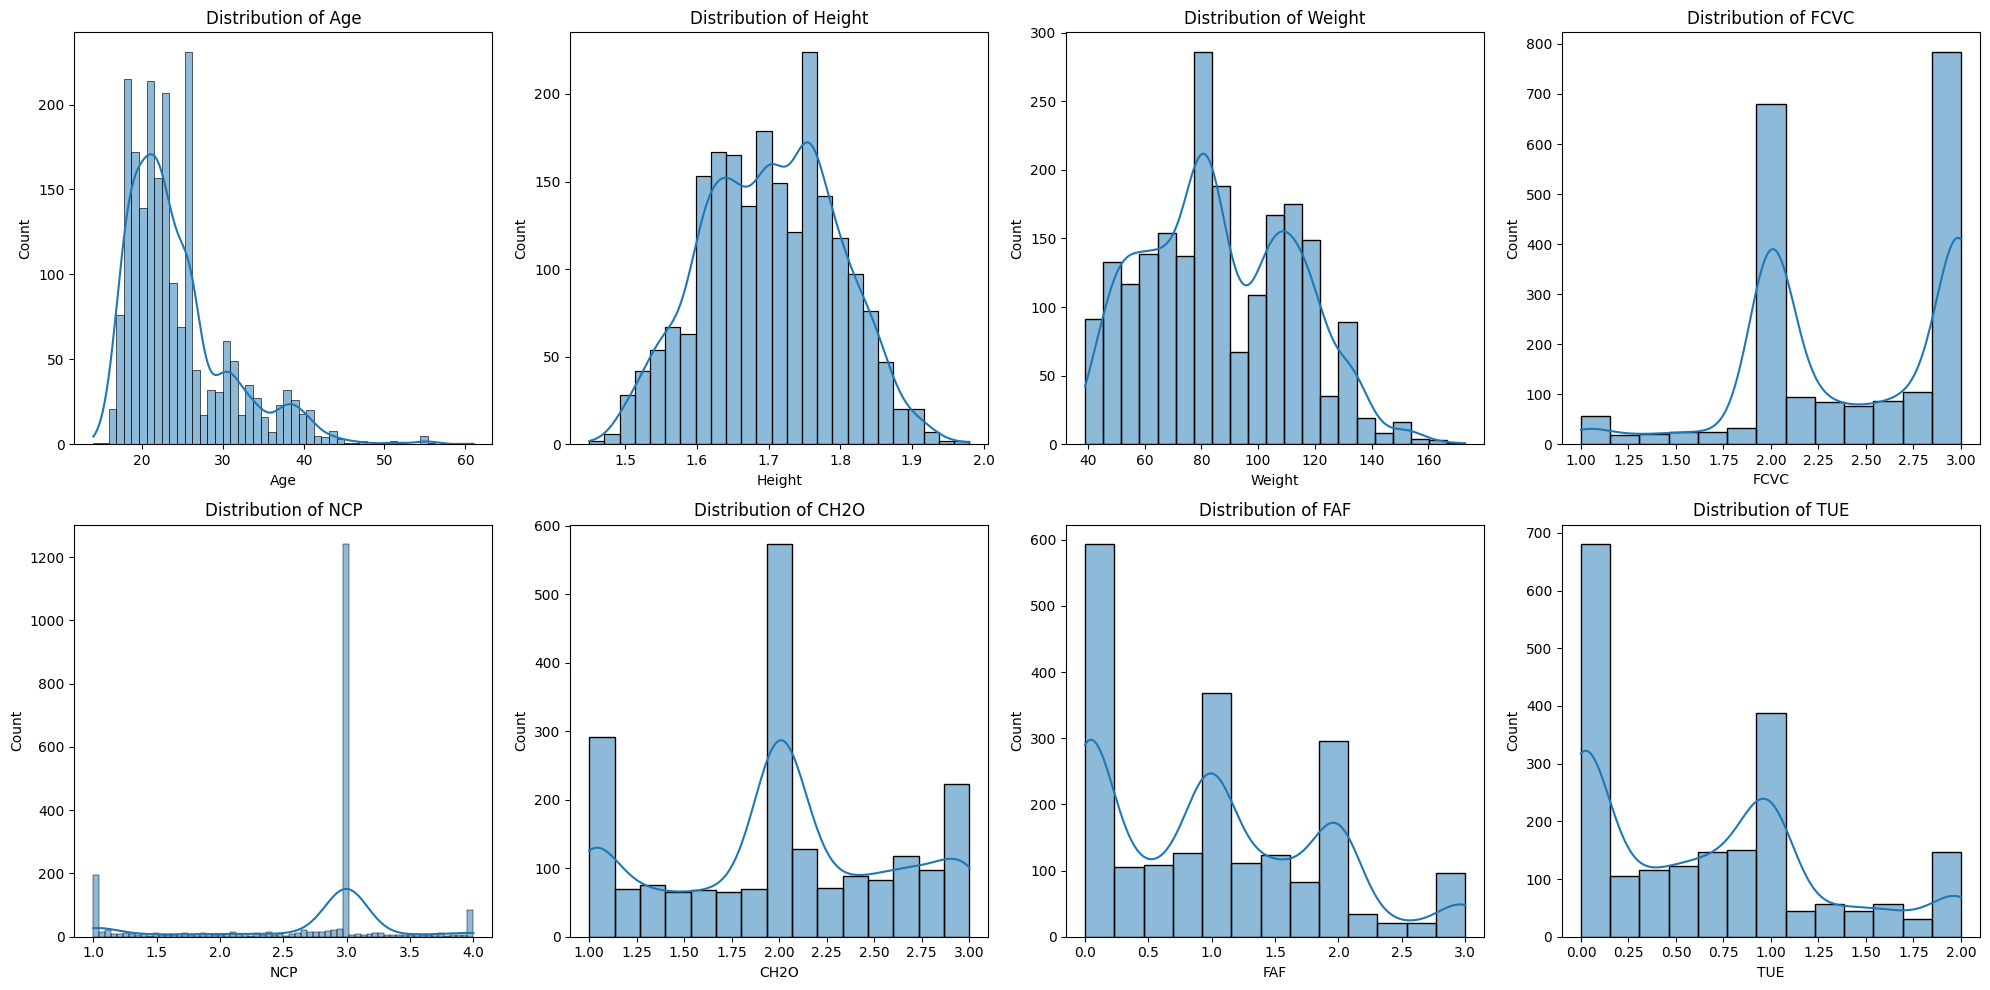

In [16]:
n_cols = 4
n_rows = (len(numerical_data) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numerical_data):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

for j in range(len(numerical_data), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

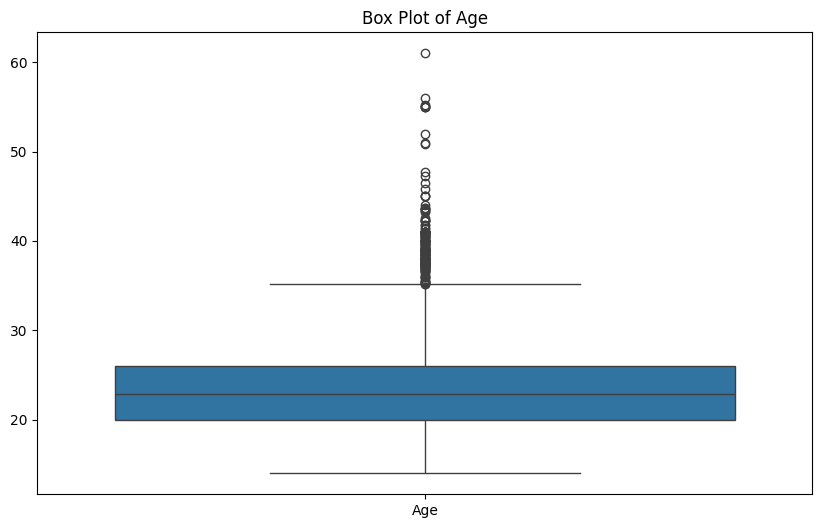

In [20]:
# box plot of columns Age,NCP, FAF, TEU
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age']])
plt.title('Box Plot of Age')
plt.show()

In [24]:
# Using Robust scaling for age
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

# Using normalization for columns NCP, FAF, TEU, FCVC, CH20
normalization_columns = ['NCP', 'FAF', 'TUE', 'FCVC', 'CH2O']
for column in normalization_columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Using standardization for columns Height, Weight
standization_columns = ['Height', 'Weight']
for column in standization_columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()


In [26]:
#columns with categorical data
categorical_data = df.select_dtypes(include=['object']).columns
print(categorical_data)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [39]:
df['CALC'].value_counts()

,count
CALC,
Sometimes,1380
no,636
Frequently,70
Always,1


In [40]:
# one hot encoding
columns_onehot = ['Gender', 'family_history_with_overweight','FAVC','SMOKE','SCC']
df_encoded = pd.get_dummies(df, columns=columns_onehot, drop_first=True)

# frequency encoding
columns_frequency =['NObeyesdad','CALC','MTRANS']
for column in columns_frequency:
    frequency_map = df[column].value_counts(normalize=True)
    df[column] = df[column].map(frequency_map)


**KNN**

In [49]:
# binning continuous values
df['NObeyesdad'] = pd.cut(df['NObeyesdad'], bins=[-np.inf, 0.5, np.inf], labels=[0, 1])
#setting NObeyesdad to INT
df['NObeyesdad'] = df['NObeyesdad'].astype(int)



In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV



# Define feature columns (X) and target column (y)
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature columns (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418

